# Heart Disease Prediction By Misthan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Importing the Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Heart Disease Prediction/heart.csv.csv")

# Exploratory Data analysis or EDA

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [ ]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

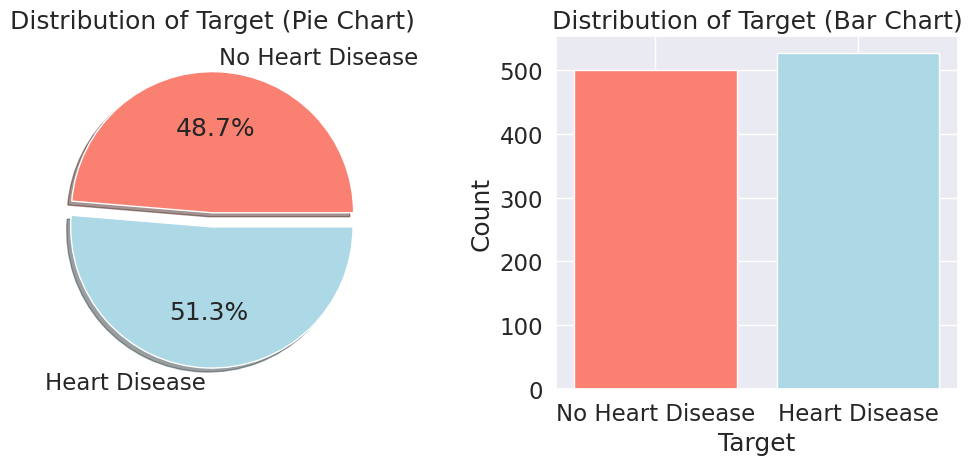

In [ ]:
# Define target variable values and their corresponding labels
target_labels = ['No Heart Disease', 'Heart Disease']
target_values = [df['target'].value_counts()[0], df['target'].value_counts()[1]]

# Plotting pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(target_values, labels=target_labels, colors=['salmon', 'lightblue'], autopct='%1.1f%%', explode=[0, 0.1], shadow=True)
plt.title('Distribution of Target (Pie Chart)')

# Plotting bar chart
plt.subplot(1, 2, 2)
plt.bar(target_labels, target_values, color=['salmon', 'lightblue'])
plt.title('Distribution of Target (Bar Chart)')
plt.xlabel('Target')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#Data Preprocessing





In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Heart Disease Frequency according to sex

In [ ]:
# viewing data through gender
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,86,226
1,413,300


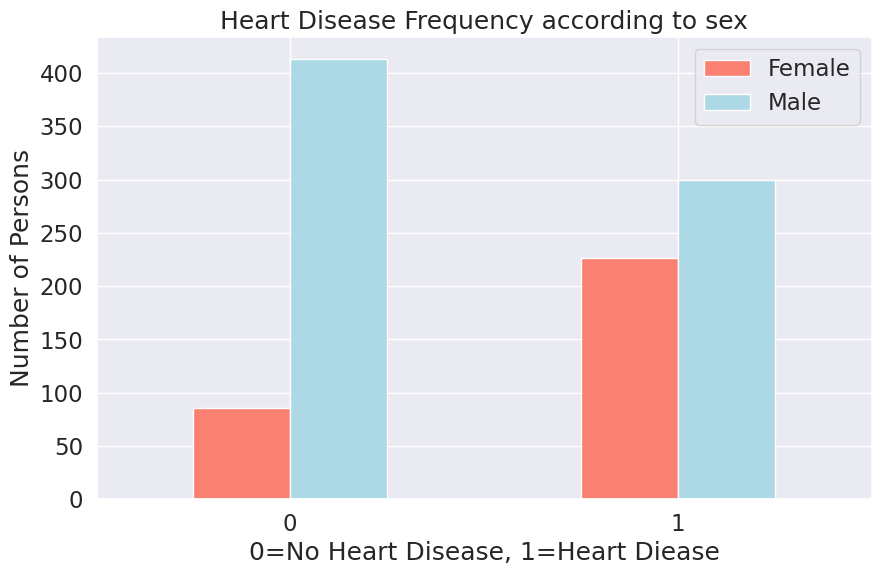

In [ ]:
# Create a plot of crosstab

pd.crosstab(df.target,df.sex).plot(kind="bar", figsize=(10,6) , color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency according to sex")
plt.xlabel("0=No Heart Disease, 1=Heart Diease")
plt.ylabel("Number of Persons")
plt.legend([ "Female","Male"])
plt.xticks(rotation=0);

Age vs Max Heart Rate for Heart Disease

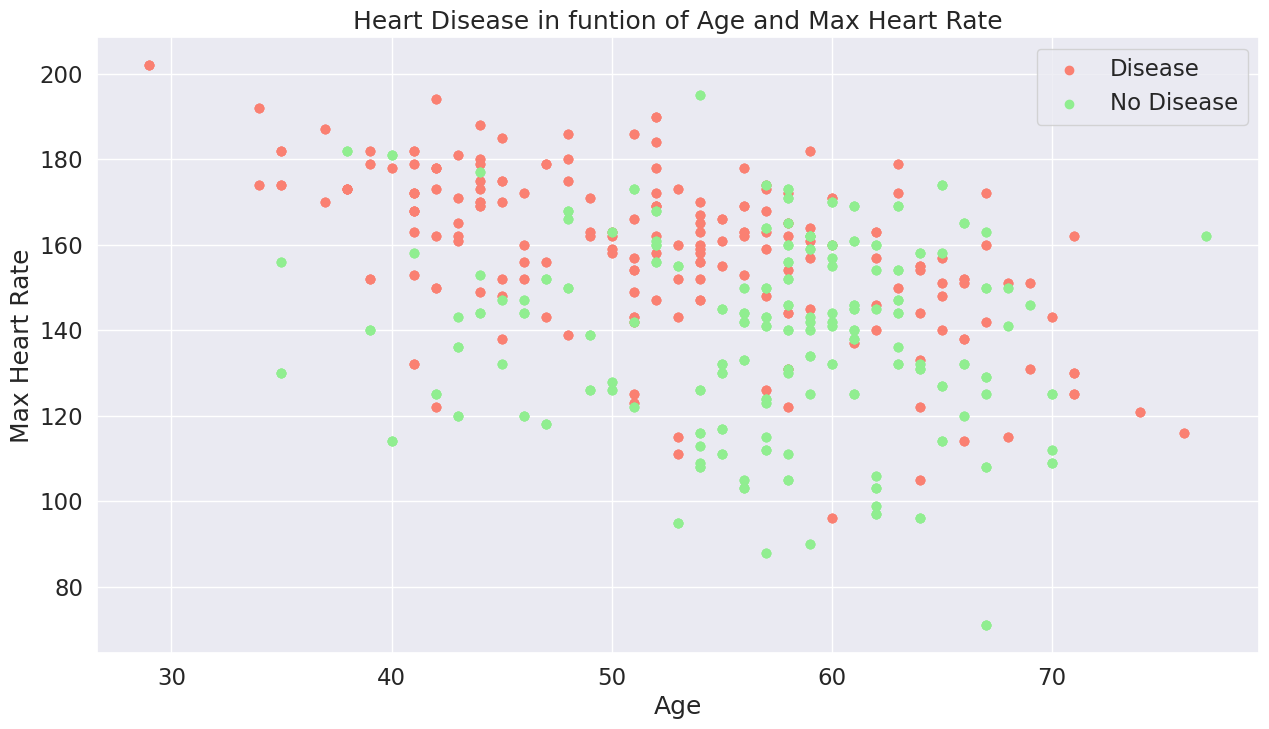

In [ ]:
# Create another figure
plt.figure(figsize=(15,8))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="lightgreen");

# Add some helpful info
plt.title("Heart Disease in funtion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Heart Disease Frequency per chest pain type

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


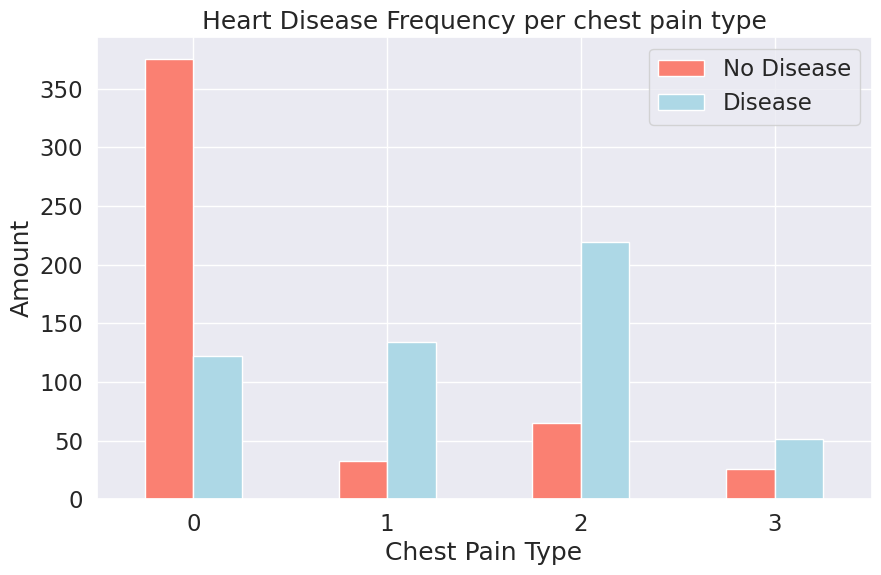

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


Plotting histogram for the entire dataset

<ipython-input-286-6f8c4be60fab>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=fig.gca())


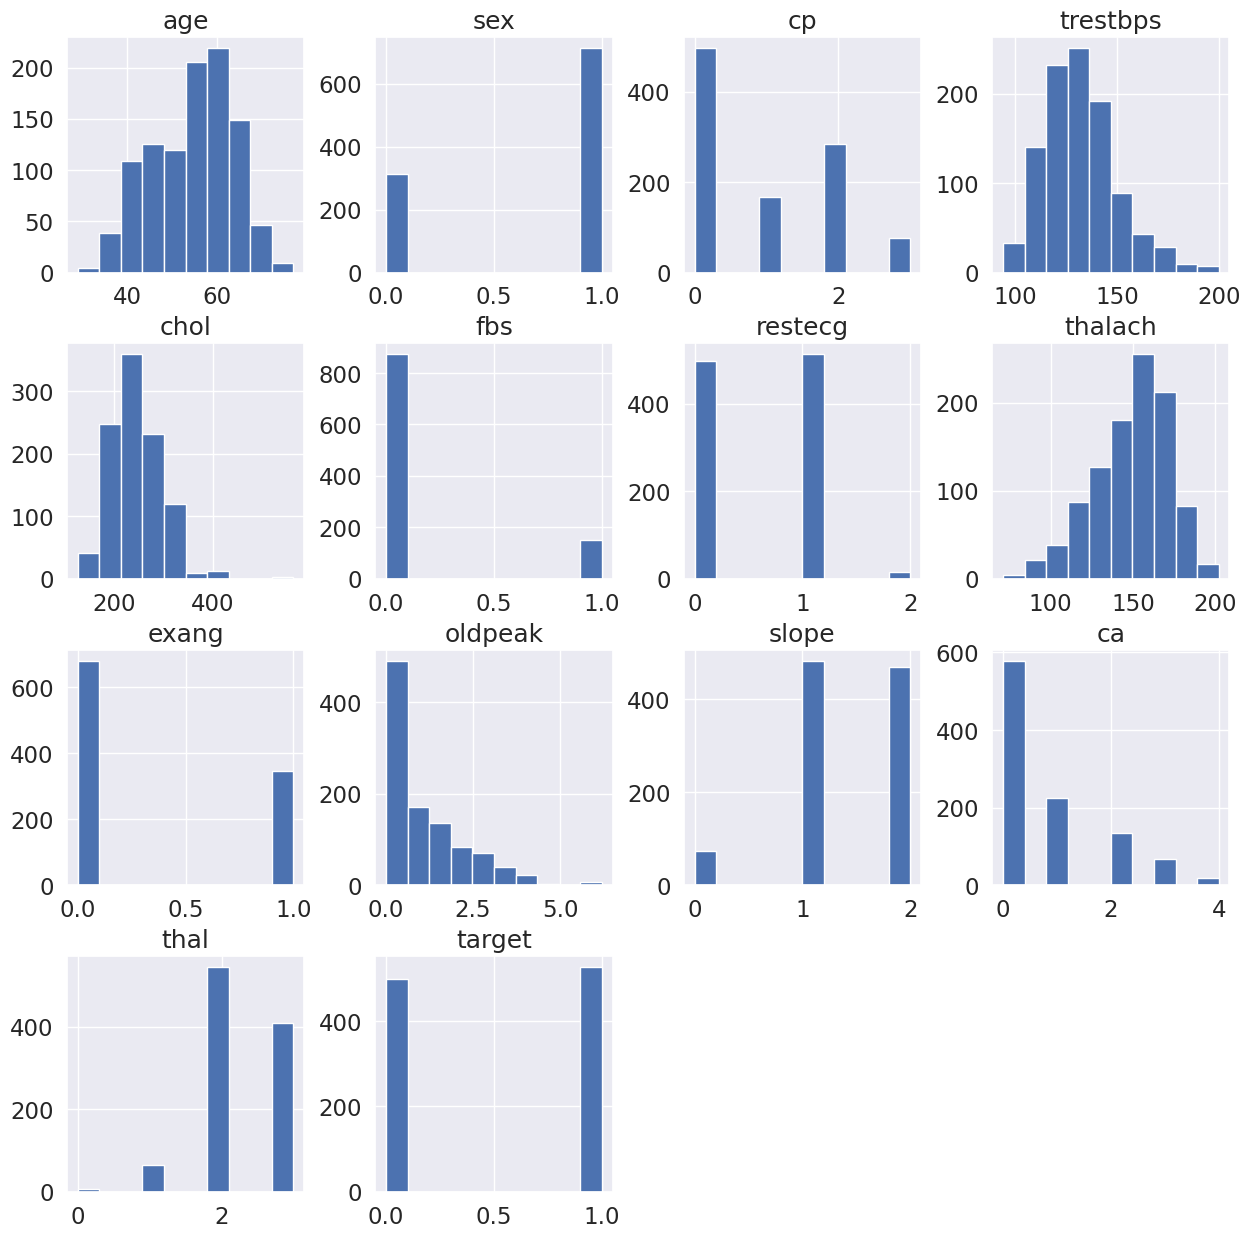

In [ ]:
# Create a figure with a specified size
fig = plt.figure(figsize=(15, 15))

# Create histograms for each column in the DataFrame
df.hist(ax=fig.gca())

# Show the plot
plt.show()

# Feature Selection

In [ ]:
# Showing correlation btw attributes
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Get correlation of all the features of the dataset

<Axes: >

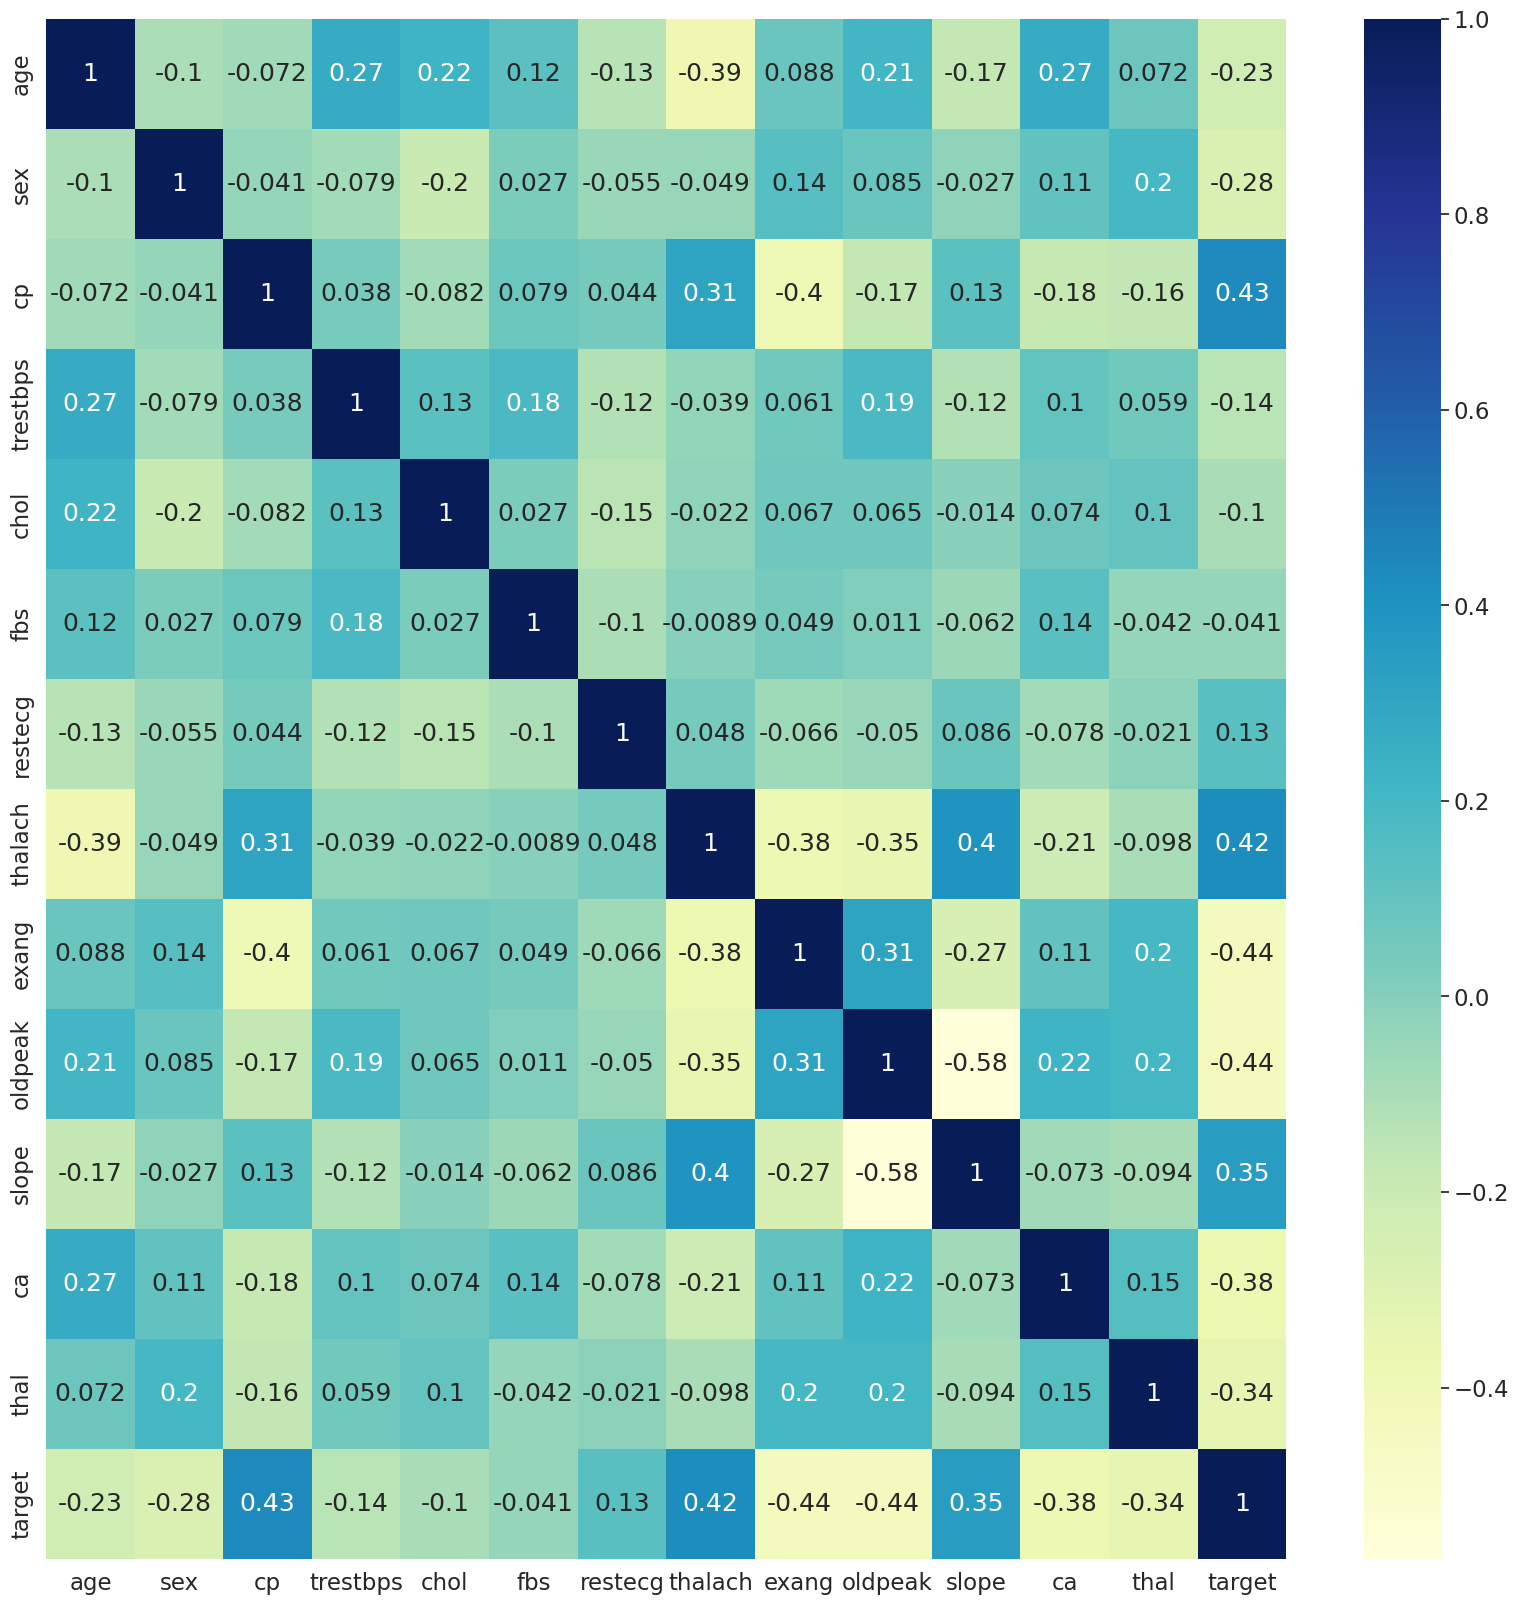

In [ ]:
# Selecting correlated features using Heatmap
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='YlGnBu')

#Modeling

In [ ]:
# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Split data into X and y
x = df.drop("target",axis=1)

y = df["target"]

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,  y,test_size=0.2)

In [ ]:
# Puts model into a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    Models : a dict of different Sklearn ml models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [ ]:
# Fitting & Evaluating given Machine Learning Models
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

In [ ]:
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

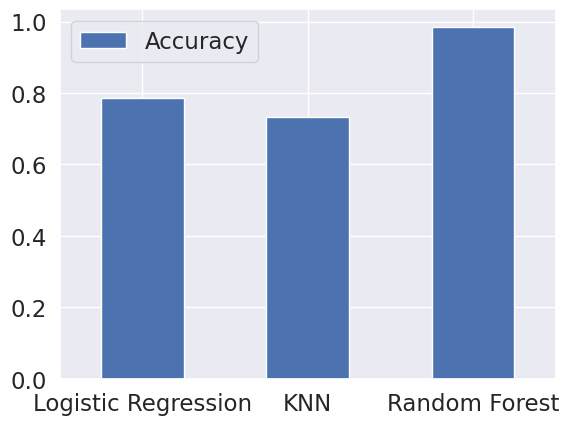

In [ ]:
# Model Comparison
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);
plt.show()

# **Hyperparameter Tuning**

##1.   K-Nearest Neighbour Classifier

In [ ]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop thorugh different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    # Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
knn.set_params(n_neighbors = np.argmax(test_scores)+1 )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Maximum KNN score on the test data: 98.54%


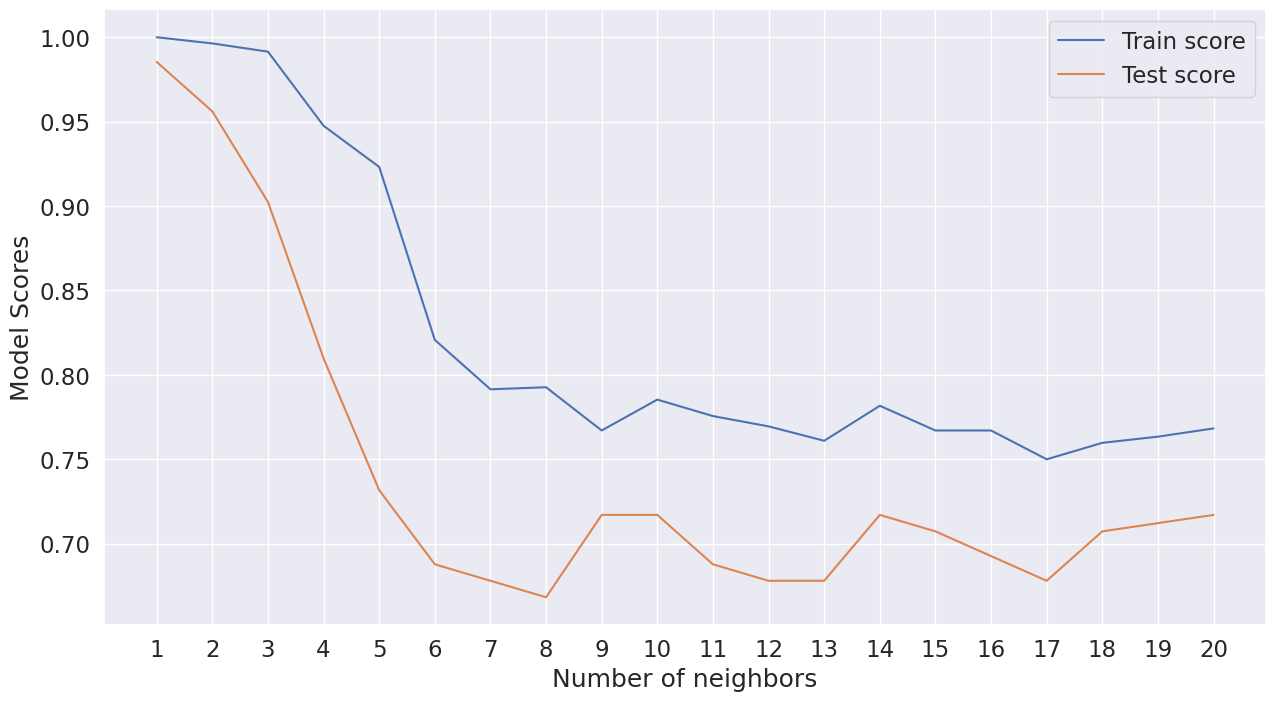

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test)

0.7317073170731707

##2.    LogisticRegression()

Using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# Fit Random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.3738237958832638}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.7853658536585366

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8658536585365854


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7853658536585366


##3.RandomForestCLassfier()

Using RandomizedSearchCV

In [ ]:
# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,100,50),
          "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [ ]:
# Setup Random seed
np.random.seed(42)

# Setup random hyperparameters search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=100,verbose=True)

# Fit the random Hyperprameter search mode for randomforestclassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.975609756097561

In [ ]:
y_preds = knn.predict(X_test)

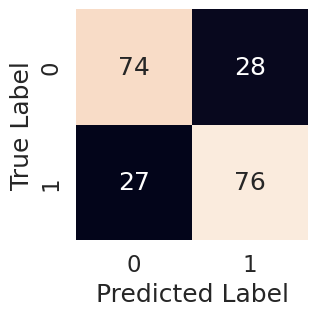

In [ ]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix on seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),fmt = ".0f", annot=True, cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [ ]:
knn.score(X_test,y_test)

0.7317073170731707

In [ ]:
#create a new classifier using best params
knn = KNeighborsClassifier()

In [ ]:
# Cross-validated accuaracy
cv_acc = cross_val_score(knn,X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(knn,X,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(knn,X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(knn,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)

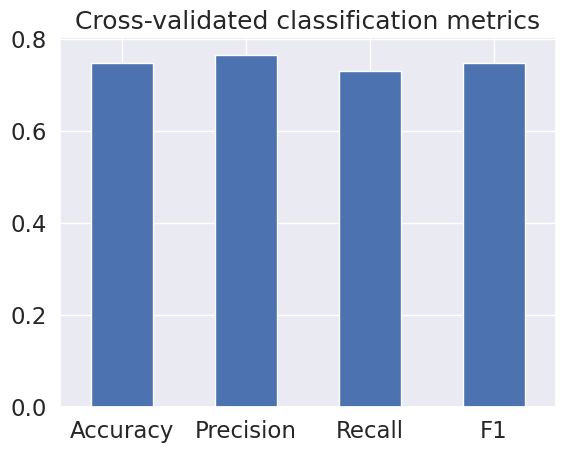

In [ ]:
# Visuzalize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"Recall":cv_recall,"F1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)
plt.xticks(rotation=0);

In [ ]:
# check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.3738237958832638}

In [ ]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C = 1.3738237958832638, solver = 'liblinear')
clf.fit(X_train,y_train);

In [ ]:
# Check Coef_
clf.coef_

array([[ 0.01309904, -1.67105374,  0.84838512, -0.01559894, -0.00822208,
        -0.1934892 ,  0.320036  ,  0.03491506, -0.78708421, -0.64712509,
         0.5663522 , -0.81344941, -1.03187889]])

In [ ]:
# Match coef's of features to coloumns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.013099042357893961,
 'sex': -1.6710537369887302,
 'cp': 0.8483851220724015,
 'trestbps': -0.015598939588830223,
 'chol': -0.008222084481241142,
 'fbs': -0.19348920494110747,
 'restecg': 0.3200360028461989,
 'thalach': 0.03491505519433211,
 'exang': -0.7870842148762902,
 'oldpeak': -0.6471250874254243,
 'slope': 0.5663522012862804,
 'ca': -0.8134494053973746,
 'thal': -1.0318788894211315}

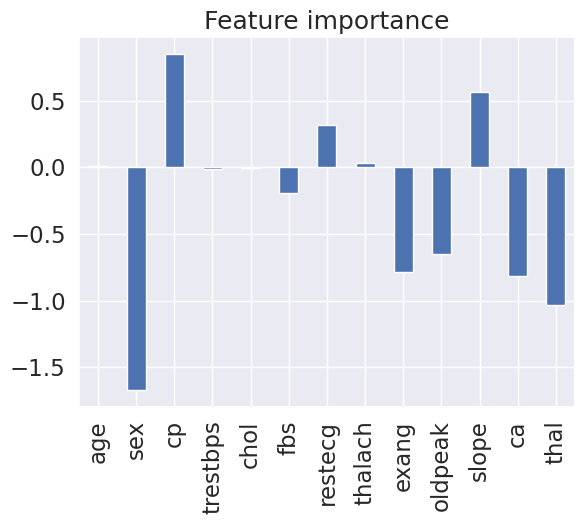

In [ ]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);

In [ ]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,86,226
1,413,300


In [ ]:
import pickle

In [ ]:
with open('/content/sample_data/model.pkl1', 'wb') as file:
    pickle.dump(model, file)